<a href="https://colab.research.google.com/github/Hemraj-Sukriya/airlinesentiment/blob/master/airlinesentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Load Data 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Data From CSV file
df=pd.read_csv("/content/drive/MyDrive/Enthire/airline_sentiment_analysis.csv")

**Data Analysis**

In [4]:
df.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [5]:
#cheack the null Values
df.isnull().sum()

Unnamed: 0           0
airline_sentiment    0
text                 0
dtype: int64

In [6]:
#Summry of Dataframe
df["airline_sentiment"].describe()

count        11541
unique           2
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [7]:
#Remove the Unnamed Column from Dataset
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [8]:
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


**Data Visulaization**

In [9]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


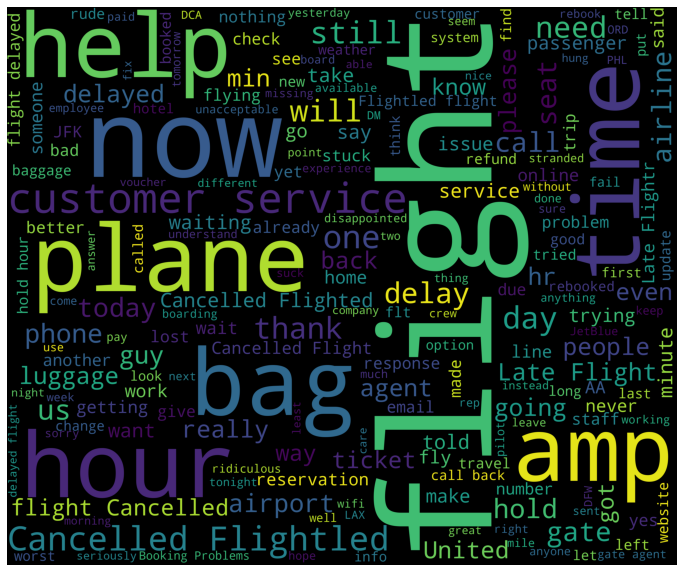

In [10]:
#Draw the wordcloud of Negative Sentiment
df_negative = df[df['airline_sentiment']=='negative']
words = ' '.join(df_negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


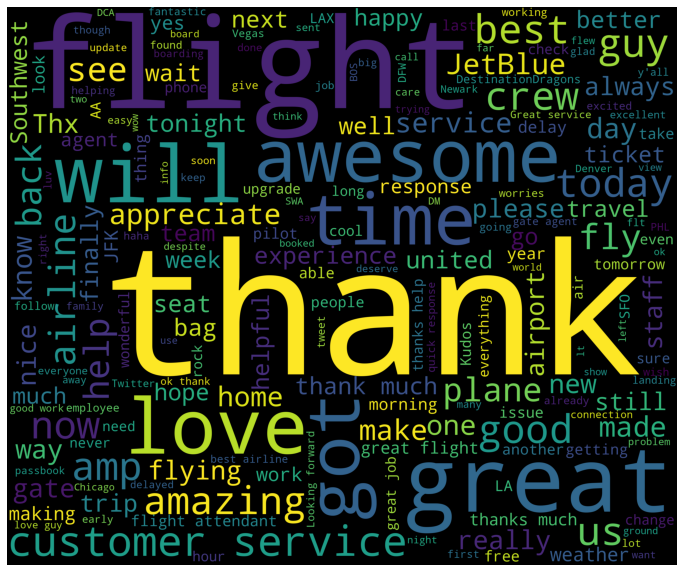

In [11]:
#Draw the wordcloud of Positive Sentiment
df_positive = df[df['airline_sentiment']=='positive']
words = ' '.join(df_positive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

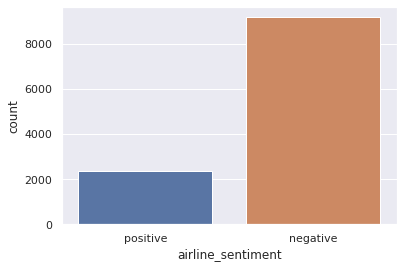

In [12]:
#Count plot of airline Sentiment
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="airline_sentiment", data=df)

**Data Cleaning**

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('punkt')

def datacleaning(text): 

          text=re.sub(r'@\w+', '', text)
          text=re.sub(r"https?://\S+|www\.\S+",'',text)

          text=re.sub("[^a-zA-Z]",' ',text)
          text=text.lower()
          stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
          whitelist = ["n't", "not", "no"]
          words = text.split()
          text= [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
          text=" ".join(text)
          stopword = stopwords.words('english')
          snowball_stemmer = SnowballStemmer('english')
          word_tokens = nltk.word_tokenize(text)
          stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
          stem=' '.join(stemmed_word)

          return stem




          

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
df['text']=df['text'].map(datacleaning)

In [15]:
df['text'].head()

0                        plus ad commerci experi tacki
1    realli aggress blast obnoxi entertain guest fa...
2                                 realli big bad thing
3    serious would pay flight seat play realli bad ...
4          yes near everi time fli vx ear worm go away
Name: text, dtype: object

In [16]:
df['text'][1]

'realli aggress blast obnoxi entertain guest face amp littl recours'

In [17]:
df['text'][1]

'realli aggress blast obnoxi entertain guest face amp littl recours'

In [18]:
#Encode the Sentiment 
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
df["airline_sentiment"] = lb.fit_transform(df["airline_sentiment"])
df.head()

,airline_sentiment,text
0,1,plus ad commerci experi tacki
1,0,realli aggress blast obnoxi entertain guest fa...
2,0,realli big bad thing
3,0,serious would pay flight seat play realli bad ...
4,1,yes near everi time fli vx ear worm go away


In [19]:
#Split the Data Into Trainging and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.33, random_state=500)

In [20]:
# Dataset is imbalanced class weights initialization
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = {i : class_weights[i] for i in range(2)}

**Word Embedding**

In [21]:
vocab_size=8000
embedding_dim=128
max_length=80
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length ,padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [23]:
print(word_index)

{'<OOV>': 1, 'flight': 2, 'not': 3, 'thank': 4, 'no': 5, 'get': 6, 'hour': 7, 'delay': 8, 'cancel': 9, 'servic': 10, 'custom': 11, 'time': 12, 'help': 13, 'call': 14, 'bag': 15, 'wait': 16, 'hold': 17, 'plane': 18, 'amp': 19, 'us': 20, 'day': 21, 'fli': 22, 'still': 23, 'tri': 24, 'go': 25, 'airlin': 26, 'one': 27, 'gate': 28, 'need': 29, 'flightl': 30, 'back': 31, 'seat': 32, 'would': 33, 'phone': 34, 'make': 35, 'agent': 36, 'got': 37, 'pleas': 38, 'book': 39, 'late': 40, 'check': 41, 'like': 42, 'work': 43, 'miss': 44, 'min': 45, 'today': 46, 'chang': 47, 'guy': 48, 'minut': 49, 'great': 50, 'never': 51, 'take': 52, 'even': 53, 'hrs': 54, 'say': 55, 'airport': 56, 'way': 57, 'know': 58, 'board': 59, 'want': 60, 'weather': 61, 'travel': 62, 'good': 63, 'problem': 64, 'realli': 65, 'connect': 66, 'last': 67, 'told': 68, 'luggag': 69, 'love': 70, 'ticket': 71, 'sit': 72, 'peopl': 73, 'home': 74, 'lost': 75, 'issu': 76, 'aa': 77, 'ever': 78, 'crew': 79, 'rebook': 80, 'let': 81, 'anoth':

In [24]:

training_padded[1]
print(training_padded.shape)

(7732, 80)


In [25]:
training_padded[0].shape

(80,)

In [26]:
training_sequences[1]

[8, 326, 46, 805, 24, 25, 74, 2248, 1267, 24, 135, 636, 608]

**Bidirectinoal Gru Model**

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM,GRU
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score    
from tensorflow.python.keras import models, layers, optimizers   
from keras.layers import  SpatialDropout1D
from keras.layers.wrappers import Bidirectional
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping

In [151]:
#define Model
class Model_Const:
  def __init__(self, vocab_size, embedding_dim, max_length, dropout, layer_dim, classes):
    self.vocab_size = vocab_size
    self.embedding_dim = embedding_dim
    self.max_length = max_length
    self.dropout = dropout
    self.layer_dim =layer_dim
    self.classes = classes

  def model(self):
    model = Sequential()
    model.add(Embedding(self.vocab_size, self.embedding_dim, input_length=self.max_length))
    model.add(SpatialDropout1D(self.dropout))
    model.add(Bidirectional(GRU(self.layer_dim, dropout=self.dropout)))
    model.add(Dense(self.classes))
    model.add(Activation('sigmoid'))
    print(model.summary())
    adam=Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'] )
    return model

In [152]:
model = Model_Const(vocab_size, embedding_dim, max_length, 0.6, 128, 1 )

In [150]:
    del model,history

In [153]:
#Model Summry
model = model.model()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 80, 128)           1024000   
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 80, 128)           0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 256)               198144    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
Total params: 1,222,401
Trainable params: 1,222,401
Non-trainable params: 0
_________________________________________________________________
None


In [154]:
#Fit model on training Data
num_epochs=40
history= model.fit(training_padded,y_train,epochs=num_epochs,callbacks = [EarlyStopping(monitor='val_accuracy', patience=7)],validation_data=(testing_padded,y_test),batch_size=128,verbose=1
                   , class_weight=class_weights)

Epoch 1/40
61/61 [==============================] - 5s 85ms/step - loss: 0.6883 - accuracy: 0.6398 - val_loss: 0.6877 - val_accuracy: 0.6616
Epoch 2/40
61/61 [==============================] - 4s 73ms/step - loss: 0.6720 - accuracy: 0.6271 - val_loss: 0.6763 - val_accuracy: 0.6818
Epoch 3/40
61/61 [==============================] - 4s 70ms/step - loss: 0.6241 - accuracy: 0.6516 - val_loss: 0.6039 - val_accuracy: 0.7501
Epoch 4/40
61/61 [==============================] - 4s 70ms/step - loss: 0.5664 - accuracy: 0.7593 - val_loss: 0.5713 - val_accuracy: 0.7524
Epoch 5/40
61/61 [==============================] - 4s 71ms/step - loss: 0.5202 - accuracy: 0.7812 - val_loss: 0.5260 - val_accuracy: 0.7768
Epoch 6/40
61/61 [==============================] - 4s 69ms/step - loss: 0.4677 - accuracy: 0.8048 - val_loss: 0.4663 - val_accuracy: 0.7973
Epoch 7/40
61/61 [==============================] - 4s 69ms/step - loss: 0.4234 - accuracy: 0.8165 - val_loss: 0.3934 - val_accuracy: 0.8286
Epoch 8/40
61

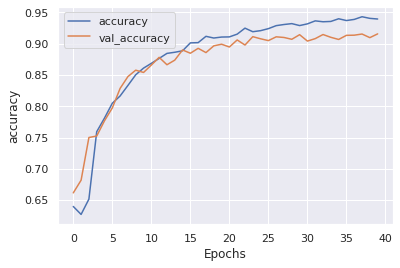

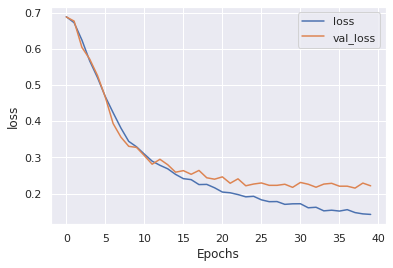

In [155]:
#Draw the Graph Between Accuracy and Epocochas  & Loss and Epochas
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [156]:
#save the Model in h5 file
model.save("sentiment.h5")

In [157]:
#save tokenizer 
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [158]:
# Predicting the Test set results
y_pred = model.predict(testing_padded)
y_pred = (y_pred > 0.5)
X_test=testing_padded

In [159]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [160]:
#Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.915726
Precision: 0.772137
Recall: 0.836317
F1 score: 0.802947
ROC AUC: 0.886279
[[2834  193]
 [ 128  654]]


In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3027
           1       0.77      0.84      0.80       782

    accuracy                           0.92      3809
   macro avg       0.86      0.89      0.87      3809
weighted avg       0.92      0.92      0.92      3809



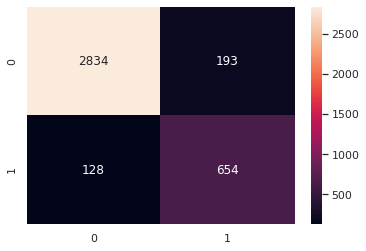

In [162]:
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt='')

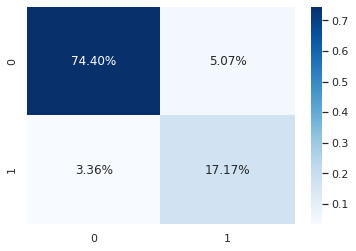

In [163]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

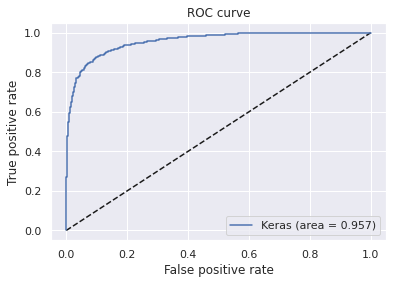

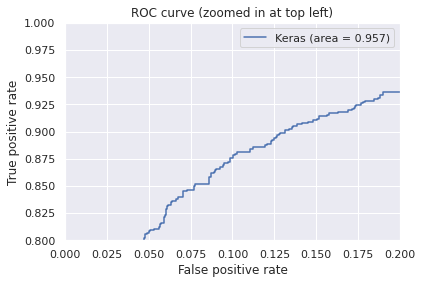

In [164]:

from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()